In [73]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [74]:
DataFrame1 = pd.read_csv("city_data.csv")
DataFrame2 = pd.read_csv("ride_data.csv")

In [75]:
def fare(group):
    return {'ride_count': group.count(), 'avg': np.round(group.mean(),2)}
groupby = DataFrame2['fare'].groupby(DataFrame2['city']).apply(fare).unstack()
groupby['city'] = groupby.index
groupby.head()

,avg,ride_count,city
city,,,
Alvarezhaven,23.93,31.0,Alvarezhaven
Alyssaberg,20.61,26.0,Alyssaberg
Anitamouth,37.32,9.0,Anitamouth
Antoniomouth,23.62,22.0,Antoniomouth
Aprilchester,21.98,19.0,Aprilchester


In [76]:
Table1 = pd.merge(DataFrame1,DataFrame2, how="inner", on="city")
Table1.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [77]:
Table2 = pd.merge(TableOne, groupby, how="inner", on="city")
Table2.head()

,city,driver_count,type,date,fare,ride_id,avg,ride_count
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795,21.81,28.0
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333,21.81,28.0
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736,21.81,28.0
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309,21.81,28.0
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829,21.81,28.0


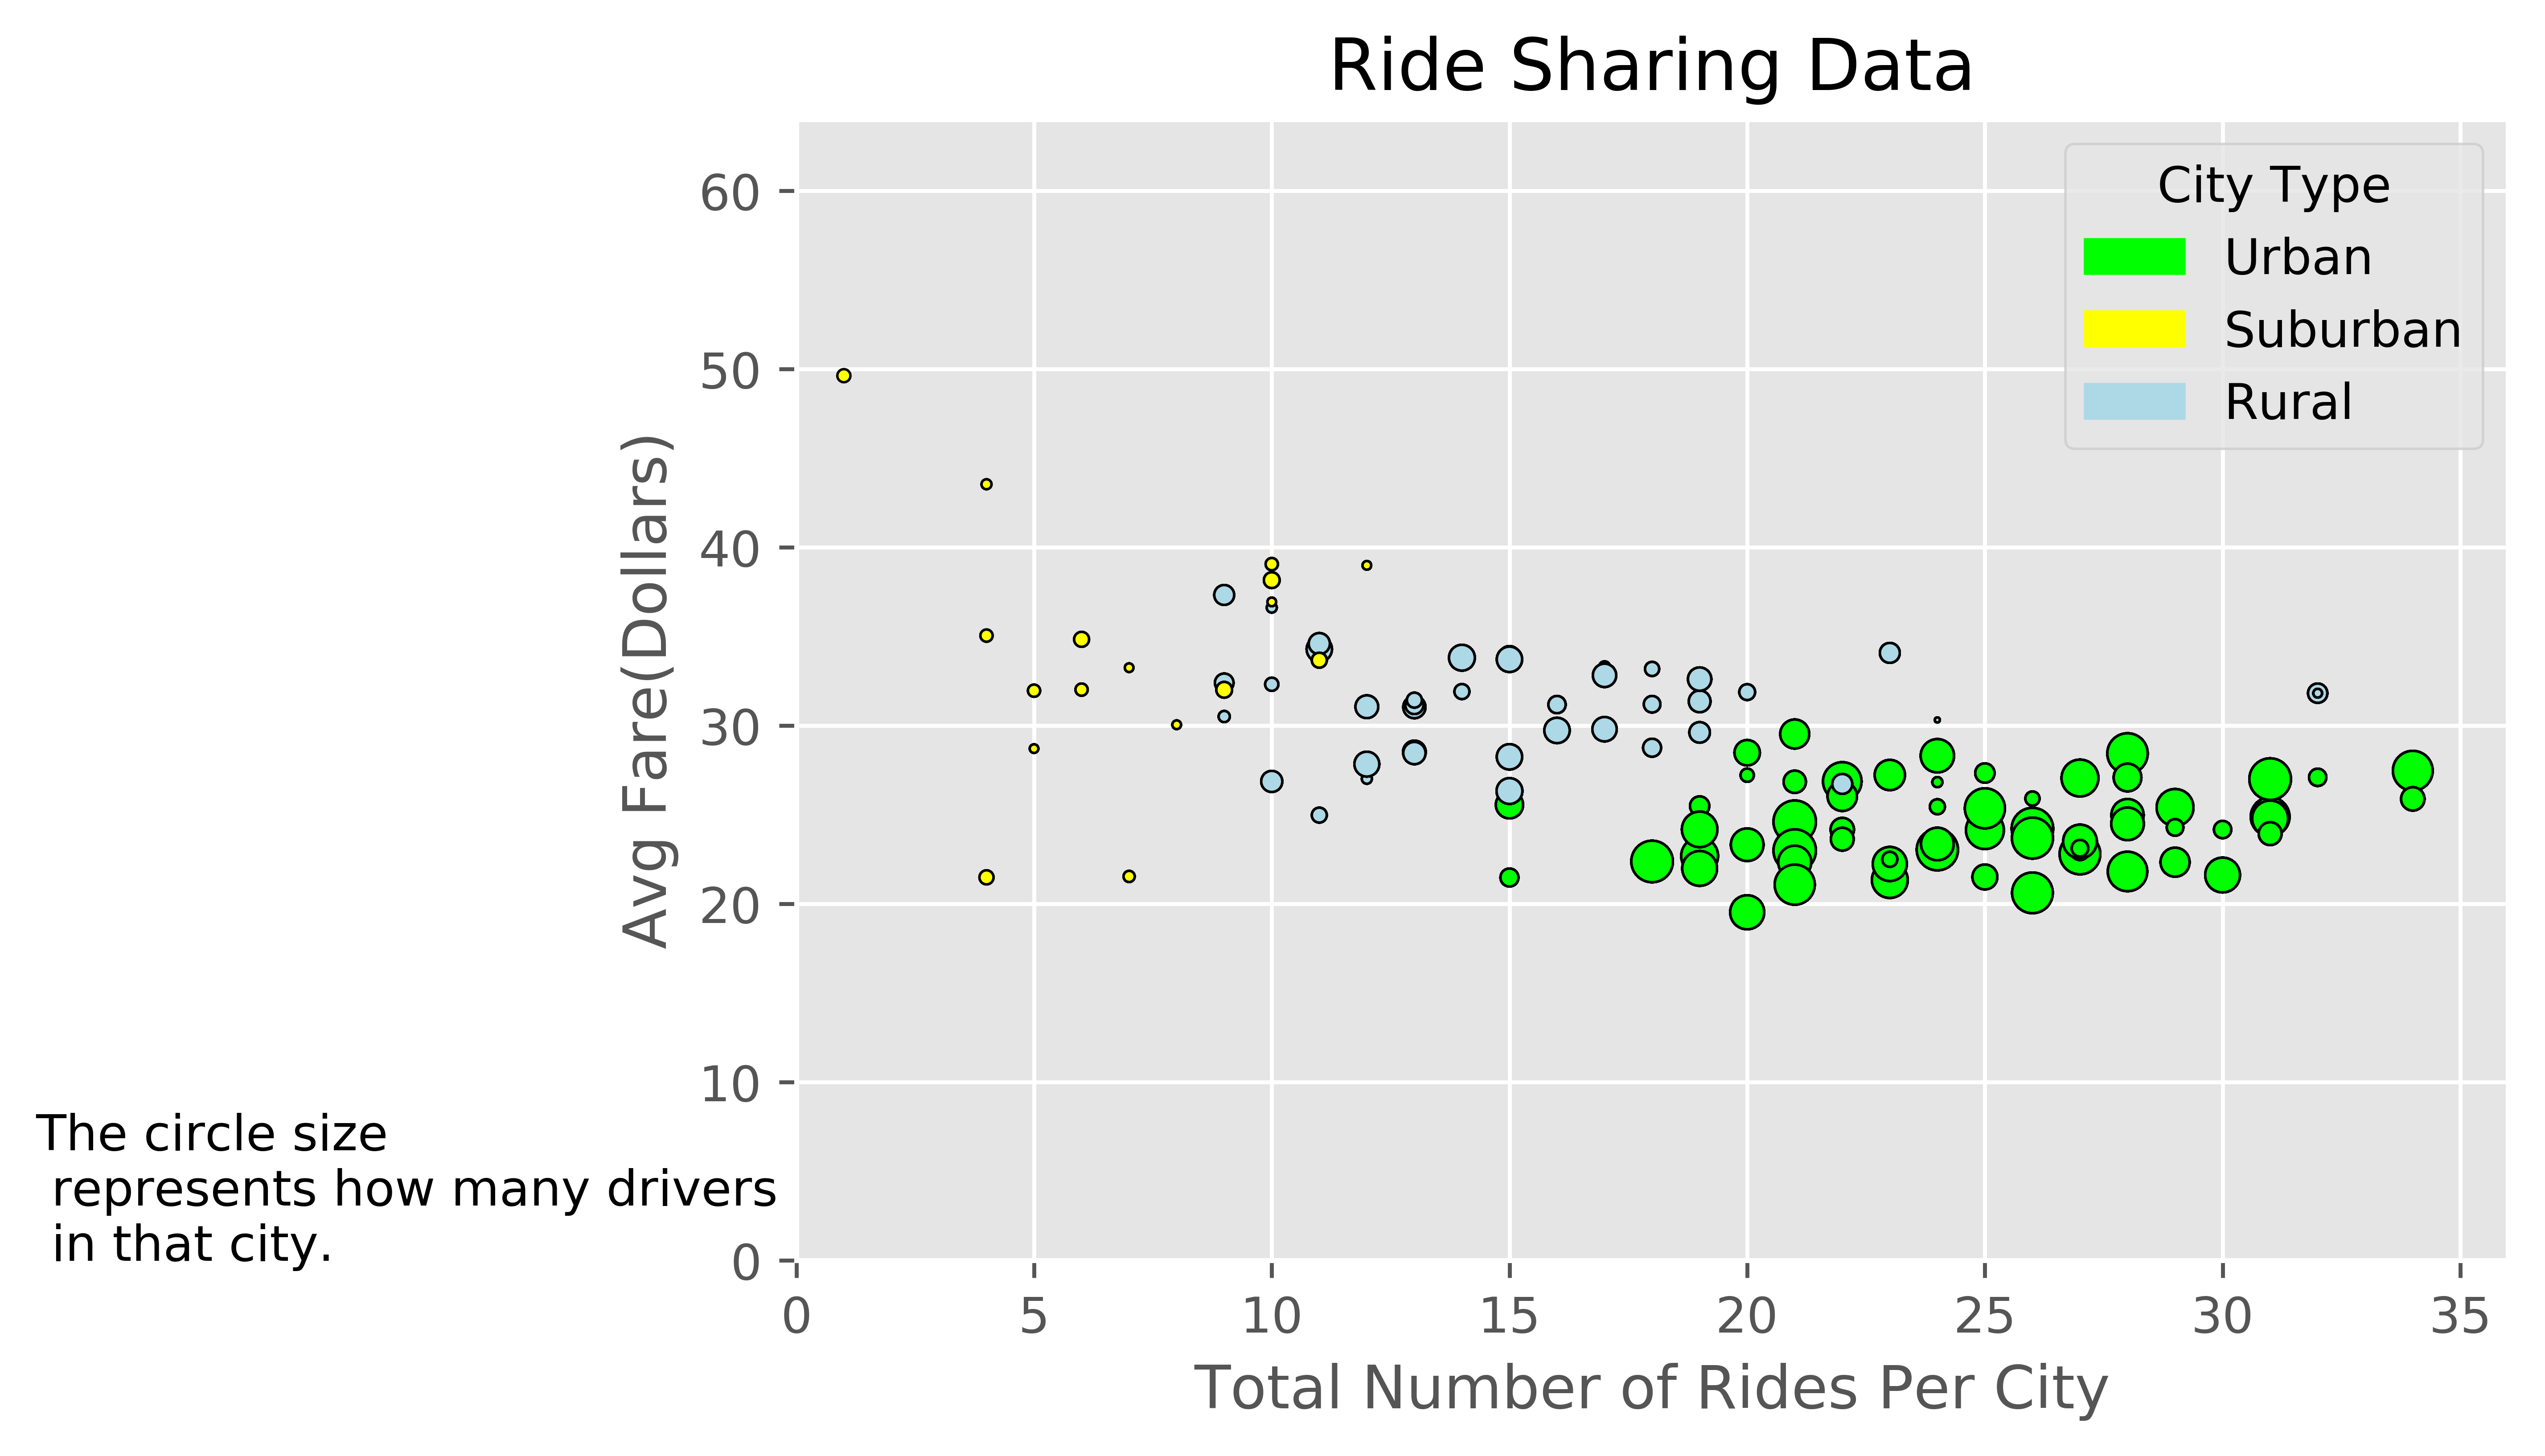

In [78]:
fig = plt.figure(dpi=400)
ax = fig.add_axes([0.8,0.8,0.8,0.8])
drivers = Table2['driver_count']
x_axis = np.arange(0, len(Table2['city'].unique()))
avg = Table2['avg'].value_counts()
y_axis = np.arange(0, len(Table['city'].unique()))

color_dict = {'Urban': 'lime', 'Suburban': 'lightblue', 'Rural': 'yellow'}

ax.set_xlim(0, max(Table2['ride_count']+2))
ax.set_ylim(0, max(avg))
ax.set_title('Ride Sharing Data')
ax.set_xlabel('Total Number of Rides Per City')
ax.set_ylabel('Avg Fare(Dollars)')
ax.scatter(Table2['ride_count'], Table2['avg'], color=[color_dict[i] for i in Table['type']], edgecolor='black', s=drivers)
blue_patch = mpatches.Patch(color='lime', label='Urban')
yellow_patch = mpatches.Patch(color='lightblue', label='Rural')
green_patch = mpatches.Patch(color='yellow', label='Suburban')
plt.legend(handles=[blue_patch,green_patch,yellow_patch], title='City Type')
plt.style.use('ggplot')
plt.text(-16,0, "The circle size \n represents how many drivers \n in that city.")
plt.show()

In [79]:
def fareride(group):
    return {'ride_count': group.count(), 'fares': np.round(group.sum(),2)}
groupbyone = Table1['fare'].groupby(Table1['type']).apply(getfareride).unstack()
groupbyone['type'] = groupbyone.index
groupbyone.head()

,fares,ride_count,type
type,,,
Rural,4255.09,125.0,Rural
Suburban,20335.69,657.0,Suburban
Urban,40078.34,1625.0,Urban


In [80]:
def getdrivers(group):
    return {'drivers': group.sum()}
groupbytwo = DataFrame1['driver_count'].groupby(DataFrame1['type']).apply(getdrivers).unstack()
groupbytwo['type'] = groupbytwo.index
groupbytwo.head()

,drivers,type
type,,
Rural,104,Rural
Suburban,638,Suburban
Urban,2607,Urban


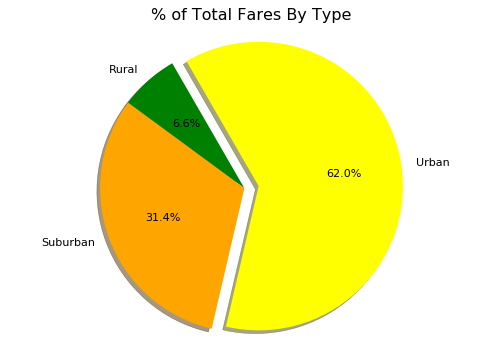

In [81]:
fig = plt.figure(dpi=100)
ax = fig.add_axes([1, 1, 1, 1])
colors = ['green','orange','yellow']
explode = (0,0,0.1)
ax.set_title("% of Total Fares By Type")
ax.pie(groupbyone['fares'], explode=explode, labels=groupbyone['type'], colors=colors, autopct = "%1.1f%%", shadow=True, startangle=120)
ax.axis("equal")
plt.show()

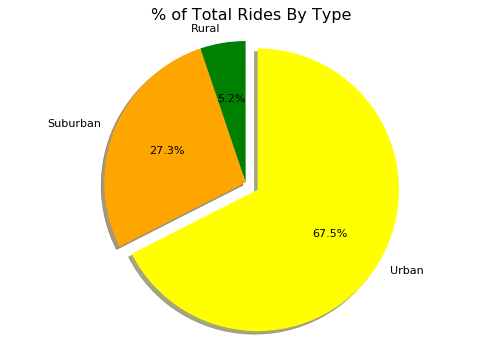

In [82]:
fig = plt.figure(dpi=100)
axone = fig.add_axes([1, 1, 1, 1])

colors = ['green','orange','yellow']
explode = (0,0,0.1)


axone.set_title("% of Total Rides By Type")
axone.pie(groupbyone['ride_count'], explode=explode, labels=groupbyone['type'], colors=colors, autopct = "%1.1f%%", shadow=True, startangle=90)
axone.axis("equal")

plt.show()

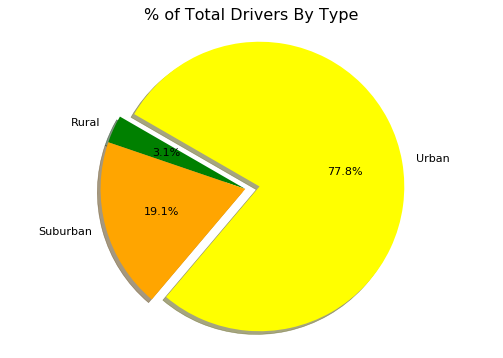

In [83]:
fig = plt.figure(dpi=80)
axtwo = fig.add_axes([1, 1, 1, 1])


colors = ['green','orange','yellow']
explode = (0,0,0.1)


axtwo.set_title("% of Total Drivers By Type")
axtwo.pie(groupbytwo['drivers'], explode=explode, labels=groupbytwo['type'], colors=colors, autopct = "%1.1f%%", shadow=True, startangle=150)
axtwo.axis("equal")

plt.show()